In [13]:
import sys
sys.path.insert(0, "../..")

import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

/tmp/ipykernel_272/4136295701.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [14]:
def set_size(width = "thesis", fraction=1, subplots=(1, 1)):
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**0.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [15]:
all_kmc_means = []
all_mf_means = []
all_mf2_means = []

all_kmc_currents = []
all_mf_currents = []
all_mf2_currents = []

In [16]:
MAEs = []
u_MAEs = []

rel_errs = []
u_rel_errs = []

MAEs_2 = []
u_MAEs_2 = []

rel_errs_2 = []
u_rel_errs_2 = []

In [17]:
net_sizes = np.arange(2, 11)

In [18]:
for size_index in range(0, 9):
    N = net_sizes[size_index]
    size_str = str(N) + "x" + str(N) + ".csv"

    ## Load MF data
    mf_means = np.loadtxt("../../data/large_sys/mf/mf_states" + size_str)
    mf_convergence = np.loadtxt("../../data/large_sys/mf/mf_convergence" + size_str)
    mf_currents = np.loadtxt("../../data/large_sys/mf/mf_currents" + size_str)

    ## Load MF2 data
    mf2_means = np.loadtxt("../../data/large_sys/mf2/entropy_means" + size_str)
    mf2_currents = np.loadtxt("../../data/large_sys/mf2/entropy_currents" + size_str)
    mf2_vars = np.loadtxt("../../data/large_sys/mf2/entropy_vars"+ size_str)

    ## Load KMC data
    kmc_means = np.loadtxt("../../data/large_sys/kmc/kmc_states" + size_str)
    kmc_steps = np.loadtxt("../../data/large_sys/kmc/kmc_steps" + size_str)
    kmc_currents = np.loadtxt("../../data/large_sys/kmc/kmc_currents" + size_str)
    kmc_errs = np.loadtxt("../../data/large_sys/kmc/kmc_errs" + size_str)

    ## valid indices
    cond = np.logical_and(kmc_currents > 0.01, kmc_steps < 2e7)
    cond = np.logical_and(cond, mf_convergence < 1e-3)
    valid_indices = np.where(cond)[0]

    ## means for images
    all_kmc_means.append(kmc_means)
    all_mf_means.append(mf_means)
    all_mf2_means.append(mf2_means)

    ## currents
    all_kmc_currents.append(kmc_currents)
    all_mf_currents.append(mf_currents)
    all_mf2_currents.append(mf2_currents)

    ## accuracies
    MAE = np.mean(np.abs(mf_means - kmc_means), axis = - 1)
    rel_err = np.abs((mf_currents - kmc_currents)/kmc_currents)
    MAE2 = np.mean(np.abs(mf2_means - kmc_means), axis = - 1)
    rel_err2 = np.abs((mf2_currents - kmc_currents)/kmc_currents)

    MAEs.append(np.mean(MAE[valid_indices]))
    u_MAEs.append(np.std(MAE[valid_indices]))

    rel_errs.append(np.mean(rel_err[valid_indices]))
    u_rel_errs.append(np.std(rel_err[valid_indices]))

    MAEs_2.append(np.mean(MAE2[valid_indices]))
    u_MAEs_2.append(np.std(MAE2[valid_indices]))

    rel_errs_2.append(np.mean(rel_err2[valid_indices]))
    u_rel_errs_2.append(np.std(rel_err2[valid_indices]))


In [19]:
rel_errs_2

[0.03321587565736355,
 0.029753759707206028,
 0.028412924698951646,
 0.030401162411101613,
 0.04286507751672828,
 0.04421173450666301,
 0.06118307506279655,
 0.046602672399452975,
 0.03302035558612886]

In [20]:
np.mean(rel_errs)

0.11219779038381243

In [21]:
np.mean(rel_errs_2)

0.03885184861626584

In [22]:
np.mean(MAEs)

0.058133681914696665

In [23]:
np.mean(MAEs_2)

0.040171413958658225

### Accuracy wrt. KMC

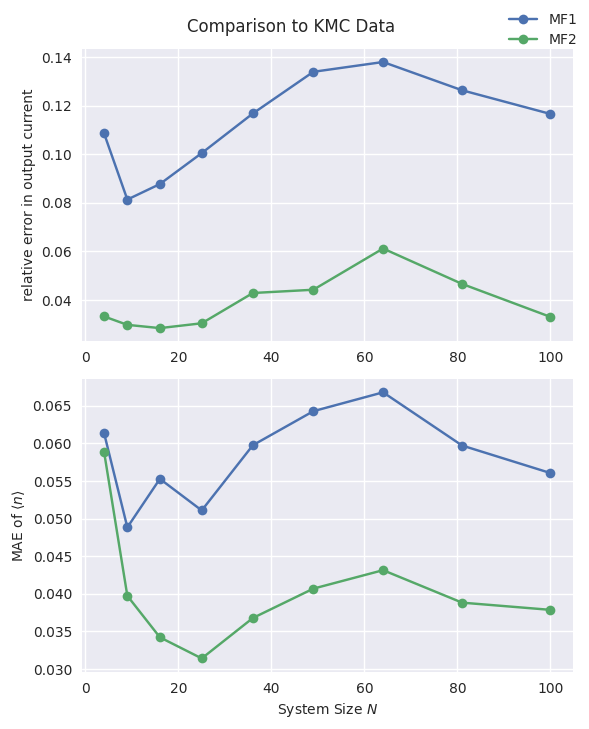

In [24]:
f, axs = plt.subplots(2, 1, figsize = set_size(subplots = (2,1)))

axs[0].plot(net_sizes**2, rel_errs, marker = "o", label = "MF1")
axs[0].plot(net_sizes**2, rel_errs_2, marker = "o", label = "MF2")
axs[0].set_ylabel("relative error in output current")


axs[1].plot(net_sizes**2, MAEs, marker = "o")
axs[1].plot(net_sizes**2, MAEs_2, marker = "o")
axs[1].set_xlabel("System Size $N$")
axs[1].set_ylabel("MAE of $\\langle n \\rangle$")

f.suptitle("Comparison to KMC Data")
f.legend()
f.tight_layout(pad = 1)
plt.savefig("../../output/large_sys/accuracy.pdf")

### Visual Mean Comparison

In [27]:
size_index = 8
size = net_sizes[size_index]

In [43]:
i = np.random.randint(0, 100)
#i = 92

kmc_im = all_kmc_means[size_index][i].reshape(size, size)
mf_im = all_mf_means[size_index][i].reshape(size, size)
mf2_im = all_mf2_means[size_index][i].reshape(size, size)
large_im = np.concatenate((kmc_im, mf_im, mf2_im), axis = 1)

In [44]:
v = np.loadtxt("../../data/large_sys/voltage_configs.csv")
print(v[i])

[ 0.12782481  0.04418659  0.06369195  0.15890693 -0.08948248]


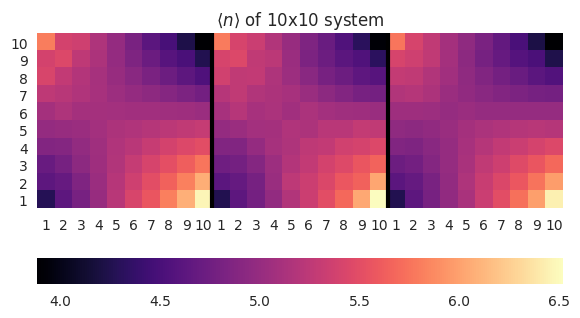

In [45]:
plt.figure(figsize=set_size())
plt.imshow(large_im, cmap = "magma")
plt.yticks(np.arange(size), np.arange(size, 0, - 1))
plt.xticks(np.arange(size * 3), np.arange(size * 3) % size + 1 )
plt.axvline(size-0.5, color = "black", linewidth = 3)
plt.axvline(2*size-0.5, color = "black", linewidth = 3)
plt.grid()
plt.title("$\\langle n \\rangle$ of "+str(size)+"x"+str(size)+" system")
cbar = plt.colorbar(orientation = "horizontal")
# cbar.ax.get_xaxis().labelpad = 15
# cbar.ax.set_xlabel('$\\langle n \\rangle$', rotation = 00)
plt.tight_layout()
plt.savefig("../../output/large_sys/visual_states"+str(size)+"x"+str(size)+".pdf")

---